# Delhivery EDA And Feature Engineering 



###  Project Objective

The objective of this project is to help Delhivery improve the efficiency and reliability of its delivery operations by analyzing trip-level data. This analysis will uncover patterns in delivery times, identify any delays or inconsistencies, and provide a clearer understanding of how actual performance compares to planned or estimated timelines. The goal is to support better decision-making and help build smarter forecasting and planning tools.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_rel, shapiro, wilcoxon

In [6]:
df = pd.read_csv("delhivery_data.csv")

#### 1. Data Understanding and cleaning:

In [8]:
# check the number of features and sample
df.shape
print(f'there are {df.shape[0]} samples and {df.shape[1]} features')

there are 144867 samples and 24 features


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [10]:
# top 5 records
df.head(20)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


#### Feature Details:
* **data** - Indicates whether the data is for testing or training.  
* **trip_creation_time** – Timestamp of trip creation.  
* **route_schedule_uuid** – Unique ID for a particular route schedule.  
* **route_type**  
  - **FTL (Full Truck Load)**: FTL shipments reach the destination sooner, as the truck makes no other pickups or drop-offs.  
  - **Carting**: Handling system consisting of small vehicles (carts).  
* **trip_uuid** - Unique ID assigned to a particular trip (A trip may include different source and destination centers).  
* **source_center** - Source ID of trip origin.  
* **source_name** - Source name of trip origin.  
* **destination_center** – Destination ID.  
* **destination_name** – Destination name.  
* **od_start_time** – Trip start time.  
* **od_end_time** – Trip end time.  
* **start_scan_to_end_scan** – Time taken to deliver from source to destination.    
* **is_cutoff** – Unknown field.  
* **cutoff_factor** – Unknown field.  
* **cutoff_timestamp** – Unknown field. 
* **actual_distance_to_destination** – Distance (in km) between source and destination



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [13]:
# Check the Datatypes
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [14]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

##### Insight : No single column can act as a unique identifier.

In [16]:
# Check for missing values:
print(f'There are {df.isnull().sum().sum()} null values present in the dataset')

There are 554 null values present in the dataset


In [17]:
# Check the percentages of missing values across all the columns 
df.isnull().sum()/len(df) * 100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

In [18]:
df['source_name'].value_counts()

source_name
Gurgaon_Bilaspur_HB (Haryana)            23347
Bangalore_Nelmngla_H (Karnataka)          9975
Bhiwandi_Mankoli_HB (Maharashtra)         9088
Pune_Tathawde_H (Maharashtra)             4061
Hyderabad_Shamshbd_H (Telangana)          3340
                                         ...  
Shahjhnpur_NavdaCln_D (Uttar Pradesh)        1
Soro_UttarDPP_D (Orissa)                     1
Kayamkulam_Bhrnikvu_D (Kerala)               1
Krishnanagar_AnadiDPP_D (West Bengal)        1
Faridabad_Old (Haryana)                      1
Name: count, Length: 1498, dtype: int64

Insight : The missing values in the "source name" and "destination name" columns are minimal and can be attributed to data entry issues. Given their low impact on the overall analysis, they can be handled accordingly for processing 

In [20]:
# check for duplicates
print(f'There are {df.duplicated().sum()} duplicate samples present in the dataset')

There are 0 duplicate samples present in the dataset


In [21]:
# Convert from object columns to datetime datatype
df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

In [22]:
# checkpoint columns where the values are varying for the given filters
df_filtered = df[(df['trip_uuid'] == 'trip-153741093647649320') & (df['source_center'] == 'IND388121AAA')]

df_filtered[[

'actual_distance_to_destination',

'actual_time',

'osrm_time',

'osrm_distance',

'segment_actual_time',

'segment_osrm_time',

'segment_osrm_distance']]

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


## 1. Segment Delay Analysis:

In [24]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
segment_cols = ['segment_actual_time','segment_osrm_time','segment_osrm_distance']
for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()
df[['segment_key', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum']]

,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.0,11.9653
1,trip-153741093647649320IND388121AAAIND388620AAB,24.0,20.0,21.7243
2,trip-153741093647649320IND388121AAAIND388620AAB,40.0,27.0,32.5395
3,trip-153741093647649320IND388121AAAIND388620AAB,61.0,39.0,45.5619
4,trip-153741093647649320IND388121AAAIND388620AAB,67.0,44.0,49.4772
...,...,...,...,...
144862,trip-153746066843555182IND131028AABIND000000ACB,92.0,94.0,65.3487
144863,trip-153746066843555182IND131028AABIND000000ACB,118.0,115.0,82.7212
144864,trip-153746066843555182IND131028AABIND000000ACB,138.0,149.0,103.4265
144865,trip-153746066843555182IND131028AABIND000000ACB,155.0,176.0,122.3150


##### Aggregate Sub journey details:

In [26]:
create_segment_dict = {
    
    'data' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first', 
    'source_center' : 'first', 
    'source_name': 'first', 
    'destination_center':'last',
    'destination_name' :'last', 
    'start_scan_to_end_scan' : 'first', 
     
    'actual_distance_to_destination' : 'last', 
    'actual_time' : 'last',
    
    'osrm_time' : 'last', 
    'osrm_distance' : 'last',
    
    'segment_actual_time' : 'first',
    'segment_osrm_time' : 'first',
    'segment_osrm_distance' : 'first',
  
    'segment_actual_time_sum' : 'last', 
    'segment_osrm_time_sum': 'last',
    'segment_osrm_distance_sum' : 'last'  
}

In [27]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by = ['segment_key','segment_actual_time'], ascending=True)

In [28]:
# Calculate delay or time difference
segment['actual_vs_osrm_diff'] = segment['segment_actual_time'] - segment['segment_osrm_time']

In [29]:
def parse_segment_column(series):
    # Extract state
    state = series.str.extract(r'\(([^)]+)\)')[0]
    
    # Remove ' (State)' part
    location = series.str.replace(r'\s*\([^)]+\)', '', regex=True)

    # Split location by '_'
    parts = location.str.split('_', expand=True)

    # Assign columns based on parts
    city = parts[0]
    zone = parts[1] if parts.shape[1] > 1 else None
    hub  = parts[2] if parts.shape[1] > 2 else None

    return pd.DataFrame({
        'city': city,
        'zone': zone,
        'hub': hub,
        'state': state
    })

In [30]:
source_info = parse_segment_column(segment['source_name']).add_prefix('source_')
dest_info   = parse_segment_column(segment['destination_name']).add_prefix('dest_')
segment = pd.concat([segment, source_info, dest_info], axis=1)

In [31]:
# Dropping the null values
segment.dropna(subset=['source_name','destination_name'],inplace = True)

In [32]:
top_delays = segment[segment['actual_vs_osrm_diff'] > 0].sort_values(by='actual_vs_osrm_diff', ascending=False)

top_delays['segment_label'] = (
    top_delays['source_city'] + ' → ' + top_delays['dest_city'] + 
    ' (' + top_delays['source_state'] + ')'
)

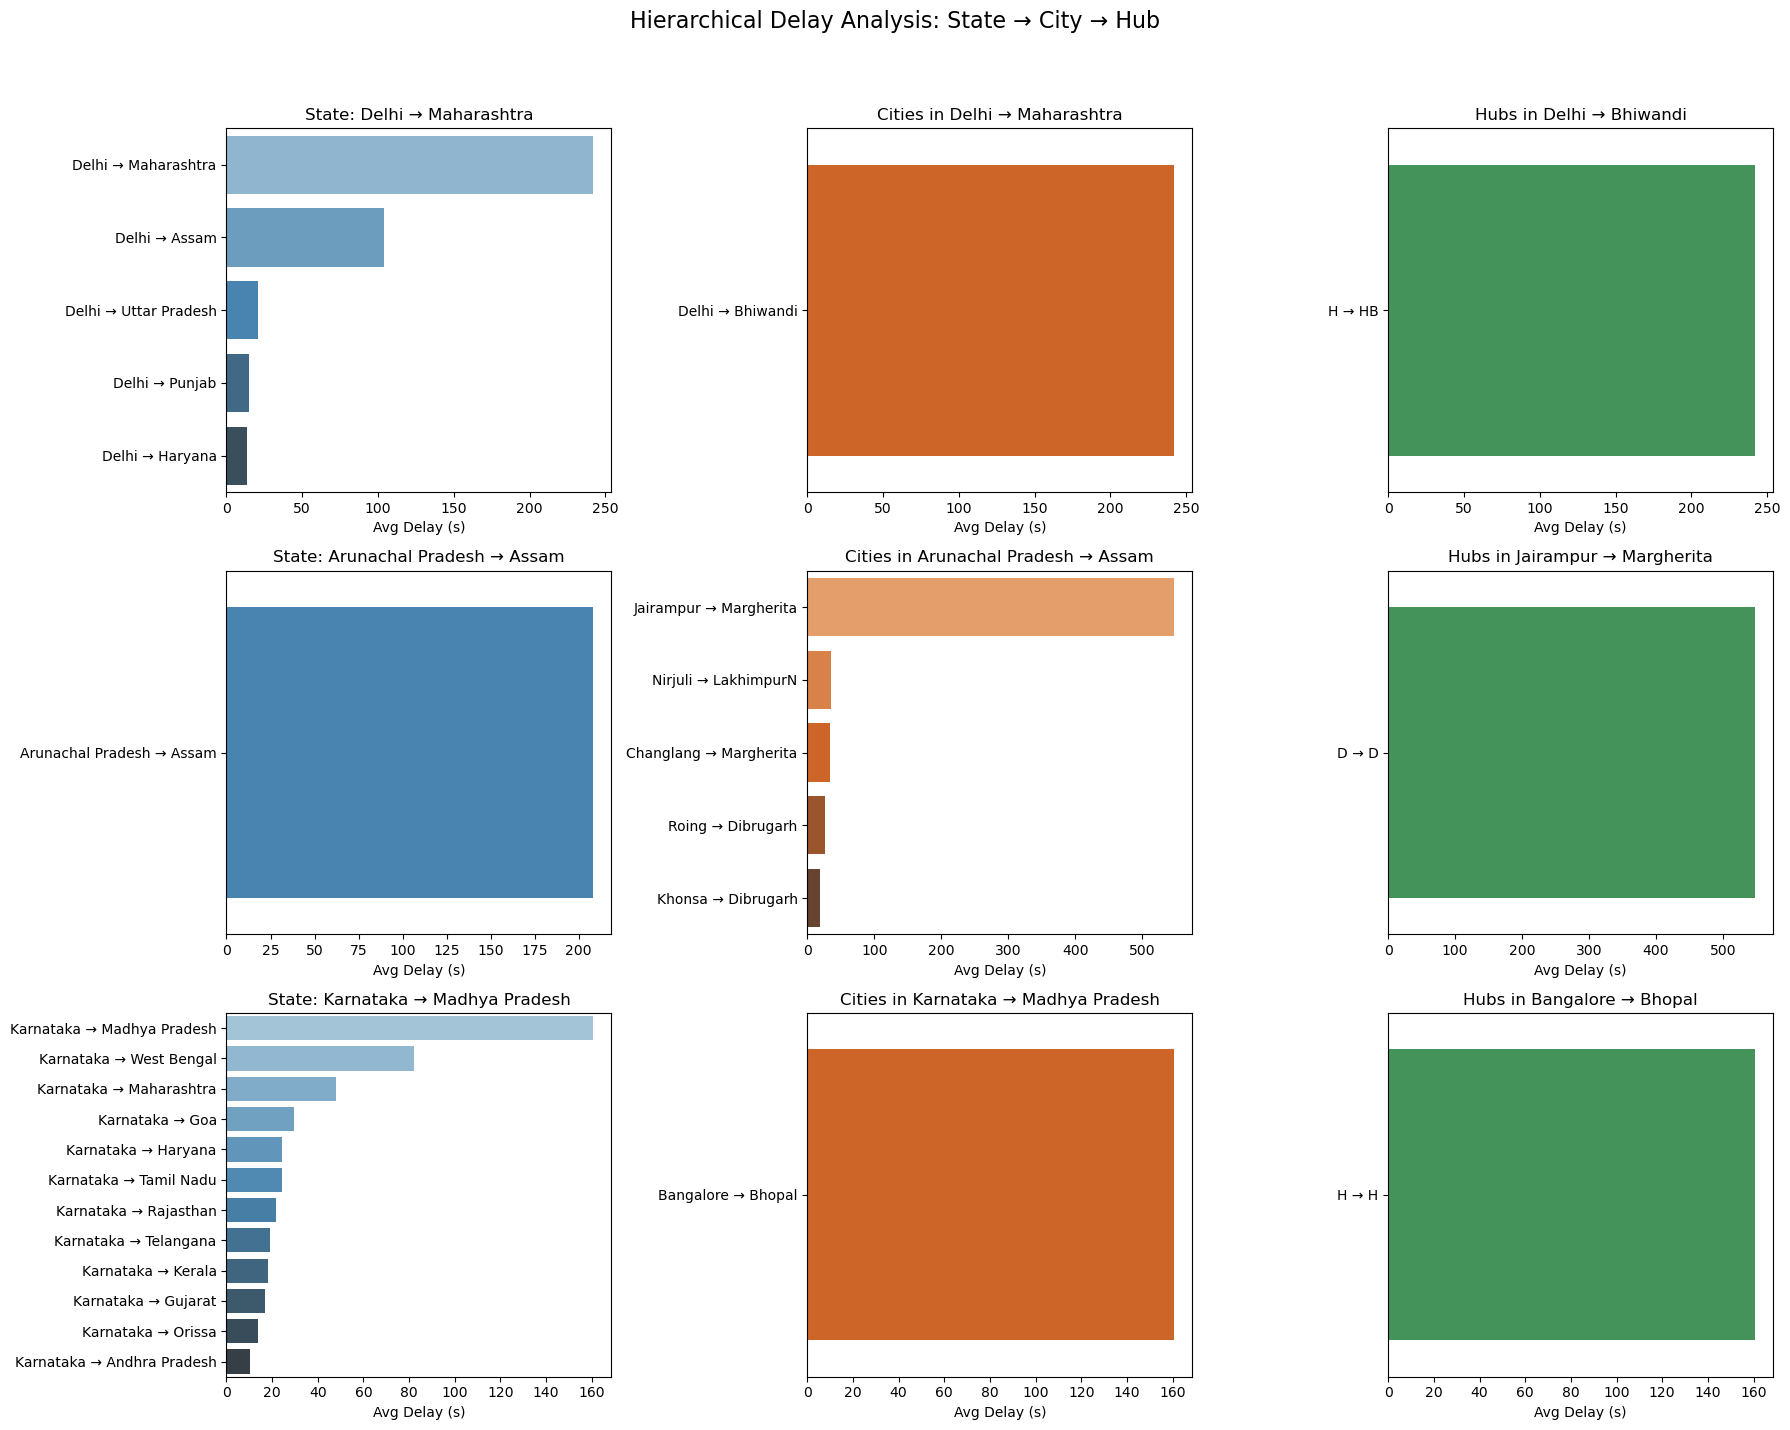

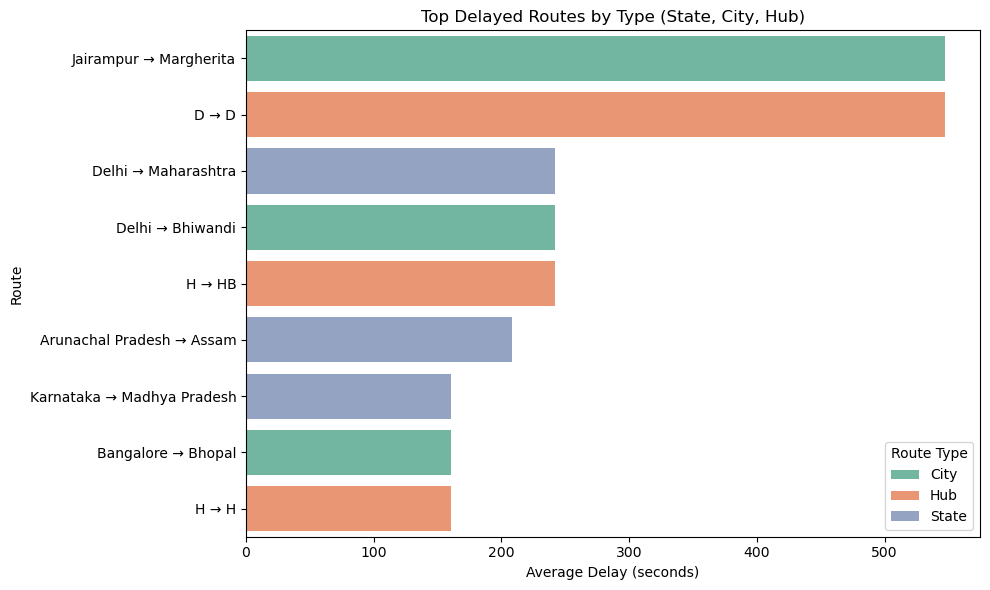

In [33]:
filtered_df = top_delays[top_delays['source_state'] != top_delays['dest_state']]

# Step 1: Aggregate state-level delays
state_delays = filtered_df.groupby(['source_state', 'dest_state'])['actual_vs_osrm_diff'].mean().reset_index()
state_delays = state_delays.sort_values(by='actual_vs_osrm_diff', ascending=False)

# Step 2: Select top 3 state pairs
top_states = state_delays.head(3).reset_index(drop=True)
top_states


# For combined plot
combined_routes = []

# Step 3: Initialize subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()
fig.suptitle('Hierarchical Delay Analysis: State → City → Hub', fontsize=16)

# Step 4: Iterate over top state pairs
for idx, row in top_states.iterrows():
    src_state = row['source_state']
    dst_state = row['dest_state']
    state_filter = (segment['source_state'] == src_state) & (segment['dest_state'] == dst_state)
    state_data = segment[state_filter]

    # Append to combined_routes
    combined_routes.append({
        'Route': f"{src_state} → {dst_state}",
        'Avg_Delay': row['actual_vs_osrm_diff'],
        'Type': 'State'
    })

    # City-level aggregation
    city_delays = state_data.groupby(['source_city', 'dest_city'])['actual_vs_osrm_diff'].mean().reset_index()
    city_delays = city_delays.sort_values(by='actual_vs_osrm_diff', ascending=False)

    # Select top city pair
    if not city_delays.empty:
        top_city = city_delays.iloc[0]
        src_city = top_city['source_city']
        dst_city = top_city['dest_city']
        avg_city_delay = top_city['actual_vs_osrm_diff']

        city_filter = (state_data['source_city'] == src_city) & (state_data['dest_city'] == dst_city)
        city_data = state_data[city_filter]

        # Append city to combined_routes
        combined_routes.append({
            'Route': f"{src_city} → {dst_city}",
            'Avg_Delay': avg_city_delay,
            'Type': 'City'
        })

        # Hub-level aggregation
        hub_delays = city_data.groupby(['source_hub', 'dest_hub'])['actual_vs_osrm_diff'].mean().reset_index()
        hub_delays = hub_delays.sort_values(by='actual_vs_osrm_diff', ascending=False)

        if not hub_delays.empty:
            top_hub = hub_delays.iloc[0]
            src_hub = top_hub['source_hub']
            dst_hub = top_hub['dest_hub']
            avg_hub_delay = top_hub['actual_vs_osrm_diff']

            # Append hub to combined_routes
            combined_routes.append({
                'Route': f"{src_hub} → {dst_hub}",
                'Avg_Delay': avg_hub_delay,
                'Type': 'Hub'
            })

        # Subplots
        sns.barplot(
            data=state_delays[state_delays['source_state'] == src_state],
            x='actual_vs_osrm_diff',
            y=state_delays[state_delays['source_state'] == src_state].apply(
                lambda x: f"{x['source_state']} → {x['dest_state']}", axis=1),
            palette='Blues_d',
            ax=axes[idx * 3]
        )
        axes[idx * 3].set_title(f'State: {src_state} → {dst_state}')
        axes[idx * 3].set_xlabel('Avg Delay (s)')
        axes[idx * 3].set_ylabel('')

        sns.barplot(
            data=city_delays.head(5),
            x='actual_vs_osrm_diff',
            y=city_delays.head(5).apply(lambda x: f"{x['source_city']} → {x['dest_city']}", axis=1),
            palette='Oranges_d',
            ax=axes[idx * 3 + 1]
        )
        axes[idx * 3 + 1].set_title(f'Cities in {src_state} → {dst_state}')
        axes[idx * 3 + 1].set_xlabel('Avg Delay (s)')
        axes[idx * 3 + 1].set_ylabel('')

        sns.barplot(
            data=hub_delays.head(5),
            x='actual_vs_osrm_diff',
            y=hub_delays.head(5).apply(lambda x: f"{x['source_hub']} → {x['dest_hub']}", axis=1),
            palette='Greens_d',
            ax=axes[idx * 3 + 2]
        )
        axes[idx * 3 + 2].set_title(f'Hubs in {src_city} → {dst_city}')
        axes[idx * 3 + 2].set_xlabel('Avg Delay (s)')
        axes[idx * 3 + 2].set_ylabel('')

# Adjust layout for subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ----------------------------
# Combined horizontal bar plot for Top Routes (State + City + Hub)
# ----------------------------

df_routes = pd.DataFrame(combined_routes).sort_values('Avg_Delay', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_routes, x='Avg_Delay', y='Route', hue='Type', dodge=False, palette='Set2')
plt.title('Top Delayed Routes by Type (State, City, Hub)')
plt.xlabel('Average Delay (seconds)')
plt.ylabel('Route')
plt.legend(title='Route Type')
plt.tight_layout()
plt.show()

## 2. Trip based analysis:

In [35]:
create_trip_dict = {

    'data' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum'
}

In [36]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [37]:
df_sorted = df.sort_values(['trip_uuid', 'od_start_time','od_end_time'])
trip_time_info = df_sorted.groupby('trip_uuid').agg({
    'od_start_time': 'first',
    'od_end_time': 'last',
    'trip_creation_time': 'first'
}).reset_index()
# Merge the trip-level info including od_start_time and od_end_time
trip = trip.merge(trip_time_info, on='trip_uuid', how='left')

In [38]:
# Then compute total tripduration
trip['trip_duration_hrs'] = (trip['od_end_time'] - trip['od_start_time']).dt.total_seconds() / 3600

In [39]:
# Delay vs schedule start
trip['trip_creation_time'] = pd.to_datetime(trip['trip_creation_time'])
trip['od_start_time'] = pd.to_datetime(trip['od_start_time'])
trip['delay'] = trip['od_start_time'] - trip['trip_creation_time']

##### these delays are not significant as they are neglible 

In [41]:
trip['start_scan_to_end_scan_hrs'] = trip['start_scan_to_end_scan'] / 3600
trip['segment_actual_time_sum_hrs'] = trip['segment_actual_time_sum'] / 3600
trip['actual_time_hrs'] = trip['actual_time'] / 3600

#### Reusable method for visualization

In [43]:
def compare_columns(trip, col1, col2, xlabel='Difference', title='Column Comparison'):
    plt.figure(figsize=(15, 5))
    
    # Histogram of the difference
    plt.subplot(1, 2, 1)
    sns.histplot(trip[col1] - trip[col2], kde=False)
    plt.xlabel(f'Difference: {col1} - {col2}')
    plt.title(f'{title} (Distribution)')
    
    # Scatter plot of the two columns
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=trip[col1], y=trip[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{title} (Scatter)')
    
    plt.tight_layout()
    plt.show()

#### 1. Trip duration time vs start_scan_to_end_scan

In [45]:
(trip['trip_duration_hrs'] - trip['start_scan_to_end_scan_hrs']).describe()

count    14787.000000
mean         8.979323
std         10.968042
min          0.384636
25%          2.475239
50%          4.729506
75%         11.046783
max        129.448644
dtype: float64

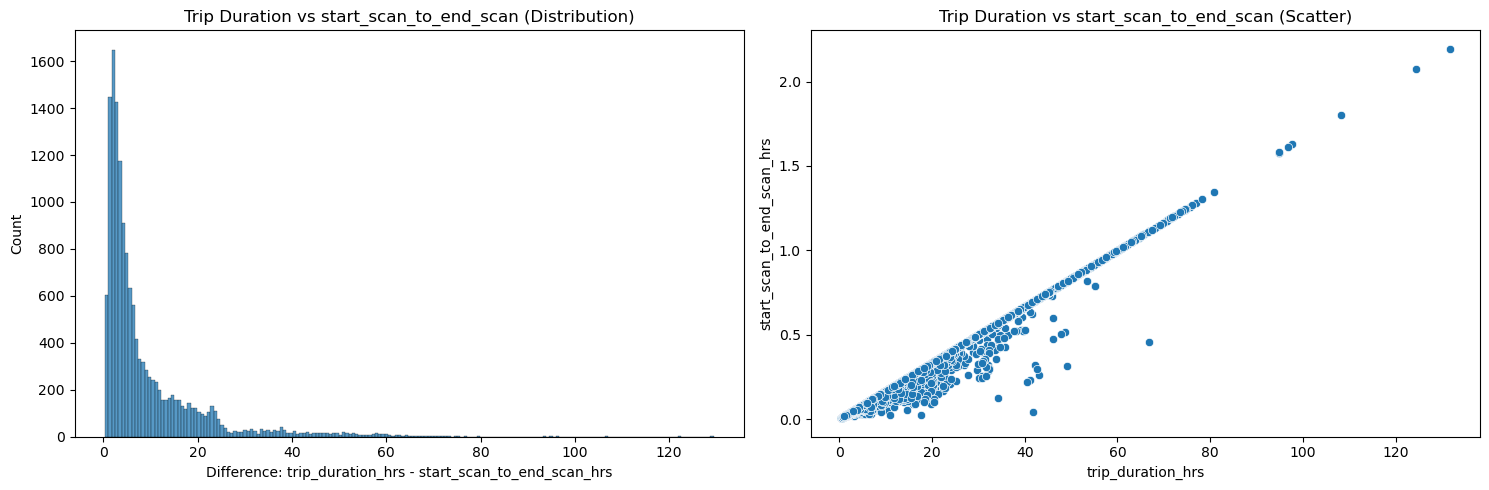

In [46]:
compare_columns(trip, 'trip_duration_hrs', 'start_scan_to_end_scan_hrs', 
                xlabel='Time difference', title='Trip Duration vs start_scan_to_end_scan')

##### Insights: Most trips have aligned scan and trip times, but a few significant outliers and a right skewed distribution suggest possible data entry issues or inconsistencies

#### 2. Trip duraion time vs actual time

In [49]:
(trip['trip_duration_hrs']-trip['actual_time']).describe()

count    14787.000000
mean      -347.179625
std        550.916578
min      -6140.684341
25%       -357.180171
50%       -143.318229
75%        -64.088503
max          2.024416
dtype: float64

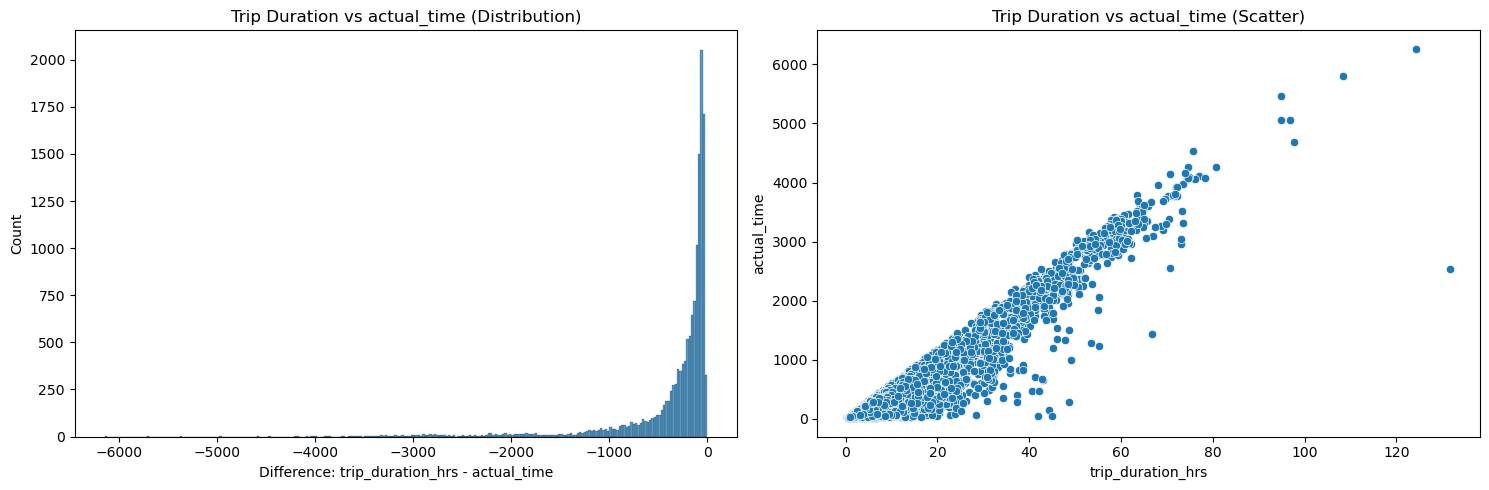

In [50]:
compare_columns(trip, 'trip_duration_hrs', 'actual_time', 
                xlabel='Time difference', title='Trip Duration vs actual_time')

##### Insights : Actual time is significantly greater than the recorded trip duration as actual time represent real world time

In [52]:
(trip['trip_duration_hrs'] - trip['osrm_time']).describe()

count    14787.000000
mean      -151.864551
std        261.287725
min      -1937.220938
25%       -157.615323
50%        -55.000768
75%        -25.802242
max         33.805502
dtype: float64

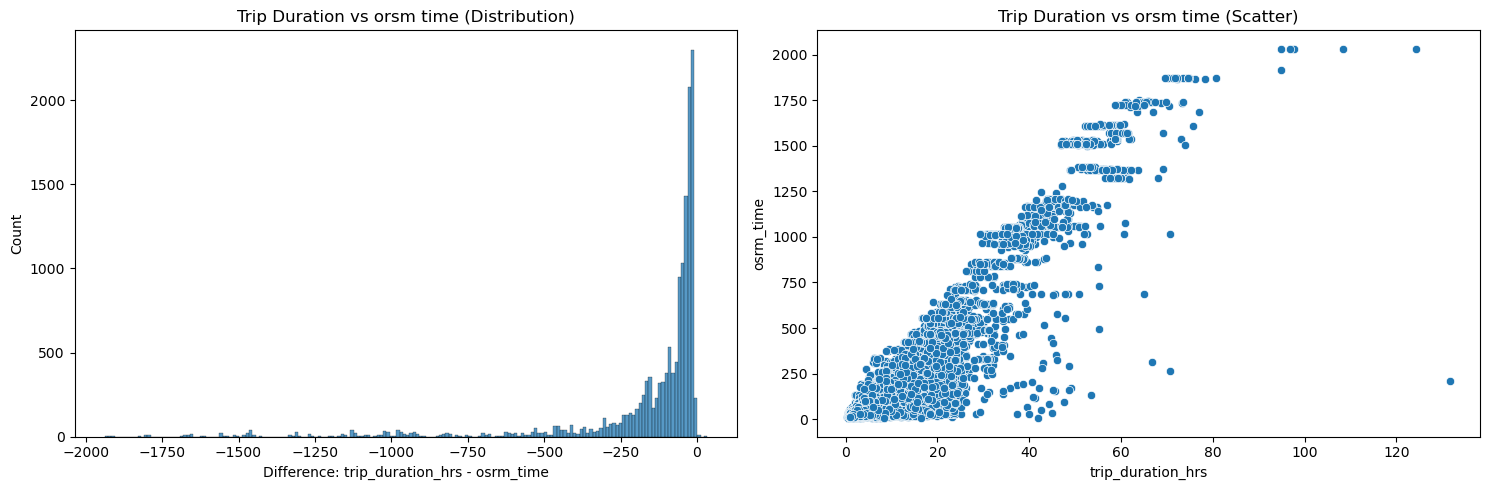

In [53]:
compare_columns(trip, 'trip_duration_hrs', 'osrm_time', 
                xlabel='Time difference', title='Trip Duration vs orsm time')

In [54]:
(trip['actual_time'] - trip['osrm_time']).describe()

count    14787.000000
mean       195.315074
std        310.966237
min        -58.000000
25%         33.000000
50%         80.000000
75%        200.000000
max       4235.000000
dtype: float64

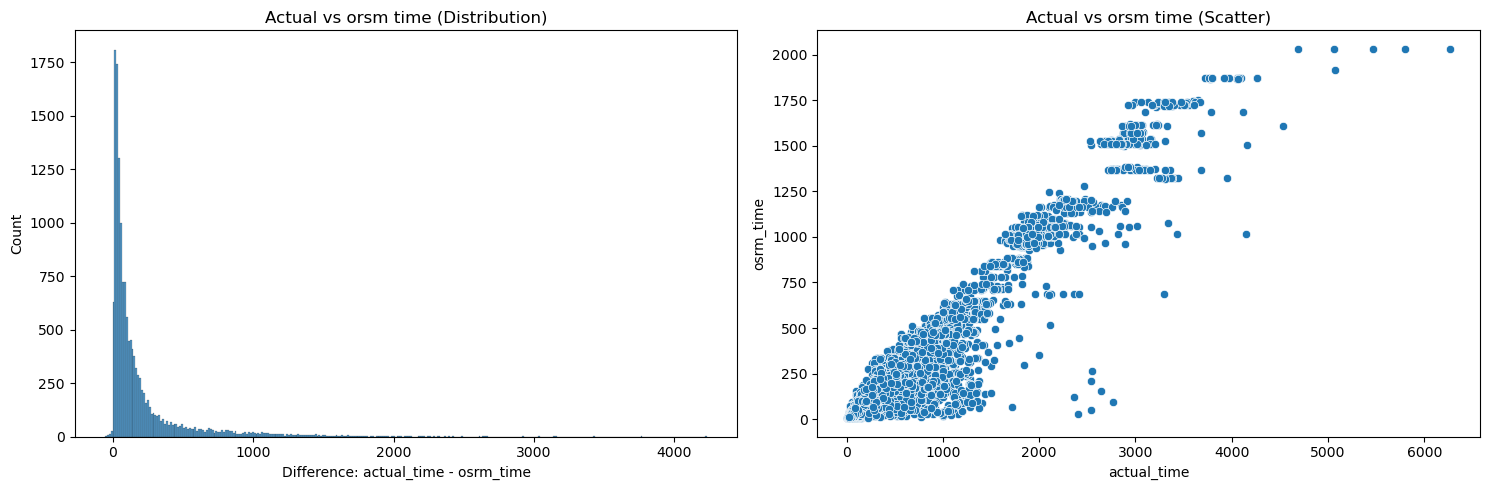

In [55]:
compare_columns(trip, 'actual_time', 'osrm_time', 
                xlabel='Time difference', title='Actual vs orsm time')

##### Insight :Actual trip times are often longer than OSRM estimates, while system-recorded durations(trip durations) are shorter, suggesting delays in execution and possible underreporting in trip logs.

In [57]:
(trip['actual_distance_to_destination'] - trip['osrm_distance']).describe()

count    14787.000000
mean       -39.797215
std         69.654373
min       -700.671392
25%        -39.924630
50%        -12.762673
75%         -6.135943
max         -0.012313
dtype: float64

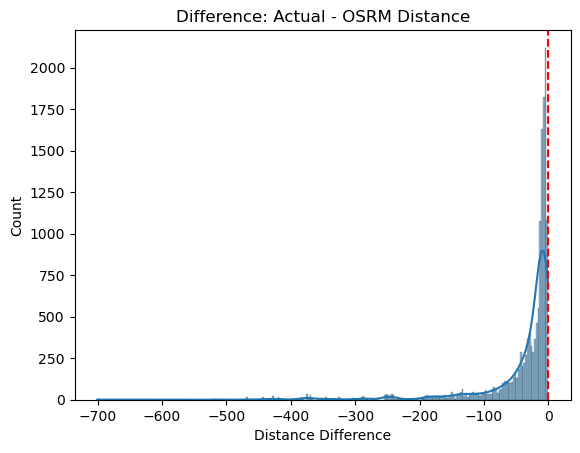

In [58]:
trip['distance_diff'] = trip['actual_distance_to_destination'] - trip['osrm_distance']
sns.histplot(trip['distance_diff'], kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Difference: Actual - OSRM Distance')
plt.xlabel('Distance Difference')
plt.show()

##### Insight :The OSRM (Open Source Routing Machine) is overestimating distances compared to actual traveled distances.
##### There might be Optimized or shortcut routes taken in reality. OSRM using conservative estimates or default paths. Possible errors in how OSRM distance was calculated.

### Outlier Detection:

In [61]:
outliers_filtered = trip.select_dtypes(include='number')
for col in outliers_filtered:
    Q1 = trip[col].quantile(0.25)
    Q3 = trip[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
# filter Outliers
    outliers_filtered = outliers_filtered[(outliers_filtered[col] >= lower) & (outliers_filtered[col] <= upper)]

### Hypothesis Testing:

##### Hypothesis test function

In [ ]:
def run_hypothesis_test(data, col1, col2, alpha=0.05):
    """
    Perform hypothesis testing between two numerical columns in the same DataFrame.
    
    Parameters:
    - data: DataFrame
    - col1, col2: Columns to compare
    - alpha: Significance level (default = 0.05)

    Returns:
    - Dictionary with test results
    """
    diff = data[col1] - data[col2]
    
    # Normality check using Shapiro-Wilk test
    stat_normality, p_normality = shapiro(diff)
    normal = p_normality > alpha
    
    if normal:
        test_name = "Paired t-test"
        test_stat, p_value = ttest_rel(data[col1], data[col2])
    else:
        test_name = "Wilcoxon signed-rank test"
        test_stat, p_value = wilcoxon(data[col1], data[col2])
    
    if p_value < alpha:
        return f"There is a statistically significant difference between '{col1}' and '{col2}'."
    else:
        return f"There is no statistically significant difference between '{col1}' and '{col2}'."

In [63]:
result_a = run_hypothesis_test(trip, 'actual_time', 'osrm_time')
print("Test a: actual_time vs osrm_time")
print(result_a)

result_b = run_hypothesis_test(trip, 'actual_time', 'segment_actual_time_sum')
print("\nTest b: actual_time vs segment_actual_time_sum")
print(result_b)

result_c = run_hypothesis_test(trip, 'osrm_distance', 'segment_osrm_distance_sum')
print("\nTest c: osrm_distance vs segment_osrm_distance")
print(result_c)

result_d = run_hypothesis_test(trip, 'osrm_time', 'segment_osrm_time_sum')
print("\nTest d: osrm_time vs segment_osrm_time")
print(result_d)


NameError: name 'run_hypothesis_test' is not defined